### Problem Understanding 


### load packages

In [1]:
#Loading libraries 
import warnings
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
sns.set_style('whitegrid')
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

### Get Data

In [3]:
#make a copy of original data
trainOriginal = pd.read_excel('data/Data_Train.xlsx')
testOriginal = pd.read_excel('data/Test_set.xlsx')

In [4]:
#loading data
train = pd.read_excel('data/Data_Train.xlsx')
test = pd.read_excel('data/Test_set.xlsx')

In [5]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


###  Data Understanding

| Column          | Details                                                 |
|-----------------|---------------------------------------------------------|
| Airline         | The name of the airline                                 |
| Date_of_Journey | The date of the journey                                 |
| Source          | The source from which the service begins.               |
| Destination     | The destination where the service ends.                 |
| Route           | The route taken by the flight to reach the destination. |
| Dep_Time        | The time when the journey starts from the source.       |
| Arrival_Time    | Time of arrival at the destination.                     |
| Duration        | Total duration of the flight.                           |
| Total_Stops     | Total stops between the source and destination.         |
| Additional_Info | Additional information about the flight.                |
| Price           | The price of the ticket.                                |

### Inspect Data

In [7]:
#check rows and columns
print ('The train data has {0} rows and {1} columns'.format(train.shape[0],train.shape[1]))
print ('----------------------------')
print ('The test data has {0} rows and {1} columns'.format(test.shape[0],test.shape[1]))

The train data has 10683 rows and 11 columns
----------------------------
The test data has 2671 rows and 10 columns


### Data Exploration

### Data Pre-Processing

#### Missing values

In [8]:
# Let's check if the train set has any missing values.
train.columns[train.isnull().any()]

Index(['Route', 'Total_Stops'], dtype='object')

In [9]:
# Let's check if the test set has any missing values.
test.columns[test.isnull().any()]

Index([], dtype='object')

In [10]:
#missing value counts in train set
miss = train.isnull().sum()/len(train)
miss = miss[miss > 0]
miss.sort_values(inplace=True)
miss

Route          0.000094
Total_Stops    0.000094
dtype: float64

In [11]:
#missing value imputation in train set
train['Route'].fillna(train['Route'].mode()[0], inplace=True) 
train['Total_Stops'].fillna(train['Total_Stops'].mode()[0], inplace=True) 

In [12]:
#check missing values in train set again
train.columns[train.isnull().any()]

Index([], dtype='object')

#### Outliers

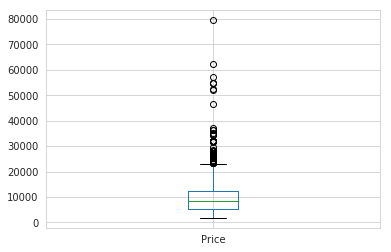

In [13]:
train.plot(kind='box')

### Feature Engineering

### Handling Date and Time Variables

In [14]:
#Cleaning Journey Date 

#Training Set

train['Journey_Day'] = pd.to_datetime(train.Date_of_Journey, format='%d/%m/%Y').dt.day

train['Journey_Month'] = pd.to_datetime(train.Date_of_Journey, format='%d/%m/%Y').dt.month

# Compare the dates and delete the original date feature

train.drop(labels = 'Date_of_Journey', axis = 1, inplace = True)
train.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [15]:
#Cleaning Journey Date 

#Testing Set

test['Journey_Day'] = pd.to_datetime(test.Date_of_Journey, format='%d/%m/%Y').dt.day

test['Journey_Month'] = pd.to_datetime(test.Date_of_Journey, format='%d/%m/%Y').dt.month

# Compare the dates and delete the original date feature

test.drop(labels = 'Date_of_Journey', axis = 1, inplace = True)
test.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_Month
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,5
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6


In [16]:
# Cleaning Duration

# Training Set

duration = list(train['Duration'])

for i in range(len(duration)) :
    if len(duration[i].split()) != 2:
        if 'h' in duration[i] :
            duration[i] = duration[i].strip() + ' 0m'
        elif 'm' in duration[i] :
            duration[i] = '0h {}'.format(duration[i].strip())

dur_hours = []
dur_minutes = []  

for i in range(len(duration)) :
    dur_hours.append(int(duration[i].split()[0][:-1]))
    dur_minutes.append(int(duration[i].split()[1][:-1]))
    
train['Duration_hours'] = dur_hours
train['Duration_minutes'] =dur_minutes

train.drop(labels = 'Duration', axis = 1, inplace = True)

train.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,non-stop,No info,3897,24,3,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,2 stops,No info,7662,1,5,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,2 stops,No info,13882,9,6,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,1 stop,No info,6218,12,5,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,1 stop,No info,13302,1,3,4,45


In [17]:
# Cleaning Duration

# Testing Set

duration = list(test['Duration'])

for i in range(len(duration)) :
    if len(duration[i].split()) != 2:
        if 'h' in duration[i] :
            duration[i] = duration[i].strip() + ' 0m'
        elif 'm' in duration[i] :
            duration[i] = '0h {}'.format(duration[i].strip())

dur_hours = []
dur_minutes = []  

for i in range(len(duration)) :
    dur_hours.append(int(duration[i].split()[0][:-1]))
    dur_minutes.append(int(duration[i].split()[1][:-1]))
    
test['Duration_hours'] = dur_hours
test['Duration_minutes'] =dur_minutes

test.drop(labels = 'Duration', axis = 1, inplace = True)

test.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Duration_hours,Duration_minutes
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,1 stop,No info,6,6,10,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,1 stop,No info,12,5,4,0
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,1 stop,In-flight meal not included,21,5,23,45
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,1 stop,No info,21,5,13,0
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,non-stop,No info,24,6,2,50


In [18]:
#Cleaning Departure and Arrival Times

# Training Set

train['Depart_Time_Hour'] = pd.to_datetime(train.Dep_Time).dt.hour
train['Depart_Time_Minutes'] = pd.to_datetime(train.Dep_Time).dt.minute

train.drop(labels = 'Dep_Time', axis = 1, inplace = True)
train.head()

,Airline,Source,Destination,Route,Arrival_Time,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Duration_hours,Duration_minutes,Depart_Time_Hour,Depart_Time_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,non-stop,No info,3897,24,3,2,50,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,2 stops,No info,7662,1,5,7,25,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,2 stops,No info,13882,9,6,19,0,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,1 stop,No info,6218,12,5,5,25,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,1 stop,No info,13302,1,3,4,45,16,50


In [19]:
#Cleaning Departure and Arrival Times

# Test Set

test['Depart_Time_Hour'] = pd.to_datetime(test.Dep_Time).dt.hour
test['Depart_Time_Minutes'] = pd.to_datetime(test.Dep_Time).dt.minute

test.drop(labels = 'Dep_Time', axis = 1, inplace = True)
test.head()

,Airline,Source,Destination,Route,Arrival_Time,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Duration_hours,Duration_minutes,Depart_Time_Hour,Depart_Time_Minutes
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,04:25 07 Jun,1 stop,No info,6,6,10,55,17,30
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,10:20,1 stop,No info,12,5,4,0,6,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:00 22 May,1 stop,In-flight meal not included,21,5,23,45,19,15
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,21:00,1 stop,No info,21,5,13,0,8,0
4,Air Asia,Banglore,Delhi,BLR → DEL,02:45 25 Jun,non-stop,No info,24,6,2,50,23,55


In [20]:
#Cleaning Departure and Arrival Times

# Training set

train['Arr_Time_Hour'] = pd.to_datetime(train.Arrival_Time).dt.hour
train['Arr_Time_Minutes'] = pd.to_datetime(train.Arrival_Time).dt.minute

train.drop(labels = 'Arrival_Time', axis = 1, inplace = True)
train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Duration_hours,Duration_minutes,Depart_Time_Hour,Depart_Time_Minutes,Arr_Time_Hour,Arr_Time_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2,50,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,7,25,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,19,0,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,5,25,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,4,45,16,50,21,35


In [21]:
#Cleaning Departure and Arrival Times

# Test set

test['Arr_Time_Hour'] = pd.to_datetime(test.Arrival_Time).dt.hour
test['Arr_Time_Minutes'] = pd.to_datetime(test.Arrival_Time).dt.minute

test.drop(labels = 'Arrival_Time', axis = 1, inplace = True)
test.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Duration_hours,Duration_minutes,Depart_Time_Hour,Depart_Time_Minutes,Arr_Time_Hour,Arr_Time_Minutes
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,10,55,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,12,5,4,0,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,21,5,23,45,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,21,5,13,0,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,24,6,2,50,23,55,2,45


In [22]:
# Classifying the Dependent and Independent Variables

# Dependent Variable
Y_train = train.iloc[:,6].values  # 6 is the index of "Price" in the Training Set 

# Independent Variables
X_train = train.iloc[:,train.columns != 'Price'].values # selects all columns except "Price"

# Independent Variables for Test Set
X_test = test.iloc[:,:].values

### Handling Categorical Variables

#### One Hot Encoding  (dummy variables)

In [23]:
# dummiesDF = pd.get_dummies(data)
# dummiesDF.head()
# merged = pd.concat([data,dummiesDF], axis ='columns')
# merged.head()
# final = merged.drop(['Additional_Info', 'Airline', 'Destination', 'Route', 'Source','Total_Stops'], axis ='columns')
# pd.set_option('display.max_columns', 500)
# final.head()

In [24]:
# we have to drop one of the dummy variables (dummy variable trap: since these variables become multi coliniority 
# when we derived dummy variables from any variables, for linear regression model no need to drop one of dummy variables
# since lR model aware of dummy variables itself drop it)
# print(final.info())

#### label Encoding 

In [25]:
from sklearn.preprocessing import LabelEncoder

le1 = LabelEncoder()
le2 = LabelEncoder()

# Training Set    

X_train[:,0] = le1.fit_transform(X_train[:,0])

X_train[:,1] = le1.fit_transform(X_train[:,1])

X_train[:,2] = le1.fit_transform(X_train[:,2])

X_train[:,3] = le1.fit_transform(X_train[:,3])

X_train[:,4] = le1.fit_transform(X_train[:,4])

X_train[:,5] = le1.fit_transform(X_train[:,5])

# Test Set


X_test[:,0] = le2.fit_transform(X_test[:,0])

X_test[:,1] = le2.fit_transform(X_test[:,1])

X_test[:,2] = le2.fit_transform(X_test[:,2])

X_test[:,3] = le2.fit_transform(X_test[:,3])

X_test[:,4] = le2.fit_transform(X_test[:,4])

X_test[:,5] = le2.fit_transform(X_test[:,5])

In [26]:
print(pd.DataFrame(X_train).head())


  0  1  2    3  4  5   6  7   8   9   10  11  12  13
0  3  0  5   18  4  8  24  3   2  50  22  20   1  10
1  1  3  0   84  1  8   1  5   7  25   5  50  13  15
2  4  2  1  118  1  8   9  6  19   0   9  25   4  25
3  3  3  0   91  0  8  12  5   5  25  18   5  23  30
4  3  0  5   29  0  8   1  3   4  45  16  50  21  35


In [27]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()

X_train = sc_X.fit_transform(X_train)

X_test = sc_X.transform(X_test)

#sc_y = StandardScaler()

Y_train = Y_train.reshape((len(Y_train), 1)) 

Y_train = sc_X.fit_transform(Y_train)

Y_train = Y_train.ravel()

In [28]:
print(pd.DataFrame(X_train).head()) # Xtrain after scaling


         0         1         2         3         4         5         6   \
0 -0.410675 -1.658441  2.416665 -1.547183  1.407309  0.499892  1.237383   
1 -1.260999  0.890052 -0.973826  0.249876 -0.253632  0.499892 -1.475239   
2  0.014486  0.040555 -0.295728  1.175633 -0.253632  0.499892 -0.531719   
3 -0.410675  0.890052 -0.973826  0.440473 -0.807278  0.499892 -0.177898   
4 -0.410675 -1.658441  2.416665 -1.247673 -0.807278  0.499892 -1.475239   

         7         8         9         10        11        12        13  
0 -1.467490 -0.970698  1.279008  1.654259 -0.235050 -1.800427 -0.890057  
1  0.250276 -0.382117 -0.196388 -1.303095  1.363492 -0.050851 -0.587124  
2  1.109160  1.030476 -1.671784 -0.607247  0.031373 -1.363033  0.018744  
3  0.250276 -0.617549 -0.196388  0.958411 -1.034321  1.407129  0.321677  
4 -1.467490 -0.735265  0.983929  0.610487  1.363492  1.115533  0.624611  


In [29]:
print(pd.DataFrame(Y_train).head())


          0
0 -1.125548
1 -0.309048
2  1.039858
3 -0.622202
4  0.914076


### Model Training - SVR

In [30]:
from sklearn.svm import SVR

svr = SVR(kernel = "rbf")

svr.fit(X_train,Y_train)

Y_pred = sc_X.inverse_transform(svr.predict(X_test))


pd.DataFrame(Y_pred, columns = ['Price']).to_excel("data/submission.xlsx", index = False)